# Day 36

# 비대칭 데이터 문제

데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(Accuracy)가 높아도 정밀도(Precision)가 떨어진다.

이러한 경우를 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [20]:
from sklearn.datasets import make_classification

X00, y00 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                               n_classes=2, n_clusters_per_class=1, class_sep=1, 
                               weights=[0.95, 0.05], random_state=1)

from sklearn.model_selection import train_test_split

X0, X_test, y0, y_test = train_test_split(X00, y00, test_size=0.25)

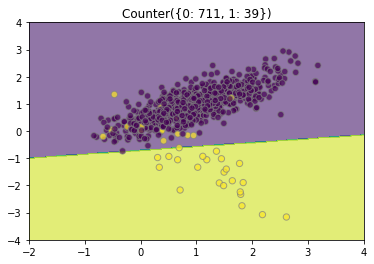

In [24]:
from collections import Counter
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

def plot_samples(X=None, y=None):
    XX, YY = np.mgrid[-2:4:300j, -4:4:300j]
    if X is None:
        X = X0
        model = LogisticRegression().fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.title(Counter(y0))
    else:
        plt.subplot(121)
        model = SVC(kernel="linear").fit(X0, y0)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X0[:, 0], X0[:, 1], marker='o', c=y0, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-3, 4)
        plt.title(Counter(y0))
        plt.subplot(122)
        model = LogisticRegression().fit(X, y)
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.contourf(XX, YY, Z, alpha=0.6)
        plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=40, 
                    linewidth=1, edgecolor='gray', alpha=0.7)
        plt.xlim(-2, 4)
        plt.ylim(-4, 4)
        plt.title(Counter(y))
        plt.tight_layout()
    plt.show()
    
    return model.predict(X)
    
y_pred = plot_samples()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y0, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       711
          1       1.00      0.59      0.74        39

avg / total       0.98      0.98      0.98       750



## 해결 방법

비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 **언더 샘플링**이나 소수 클래스 데이터를 증가시키는 **오버 샘플링**을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.

* 오버샘플링(Over-Sampling)
* 언더샘플링(Under-Sampling)
* 복합샘플링(Combining Over-and Under-Sampling)

<img src="https://datascienceschool.net/upfiles/c60d501391514092ae2044c39dc7bf7e.png">

## imbalanced-learn 패키지

imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지


```
pip install imblearn
```

## 언더 샘플링

* `RandomUnderSampler`: random under-sampling method
* `TomekLinks`: Tomek’s link method
* `CondensedNearestNeighbour`: condensed nearest neighbour method
* `OneSidedSelection`: under-sampling based on one-sided selection method
* `EditedNearestNeighbours`: edited nearest neighbour method
* `NeighbourhoodCleaningRule`: neighbourhood cleaning rule

**Tomeklink는 pair로 구성되며 하나는 positive, 하나는 negative인 쌍이다. tomeklink는 둘의 거리가 다른 어떤 포인트를의 거리보다도 가까울 때 둘을 tomeklink라 부른다. tomeklink를 통해 다르게 분류된 점 주변의 majority class를 없애주는 역할을 한다.**

**Edited Nearest Neighbor: Majority class이나 boundary근처에 있으며 이웃이 minority class라면 이런 종류의 instance를 삭제한다.**

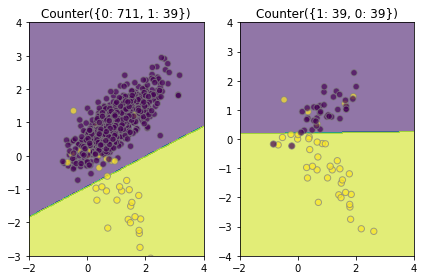

In [56]:
from imblearn.under_sampling import *

X, y = RandomUnderSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

Imalanced data를 분석할 때는 accuracy보다 Recall Rate을 목표로 하는 경우가 많다.

In [27]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91        39
          1       0.94      0.87      0.91        39

avg / total       0.91      0.91      0.91        78



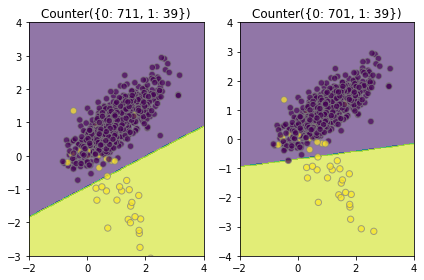

In [54]:
X, y = TomekLinks(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [55]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       701
          1       0.96      0.59      0.73        39

avg / total       0.98      0.98      0.97       740



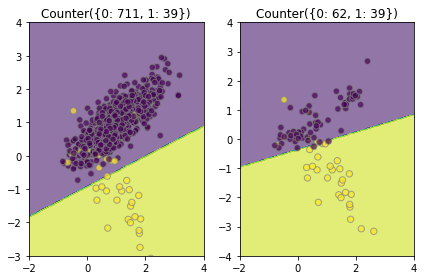

In [30]:
X, y = CondensedNearestNeighbour(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [31]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.97      0.89        62
          1       0.93      0.67      0.78        39

avg / total       0.86      0.85      0.85       101



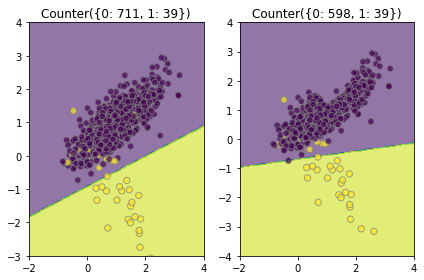

In [32]:
X, y = OneSidedSelection(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [33]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99       598
          1       1.00      0.59      0.74        39

avg / total       0.98      0.97      0.97       637



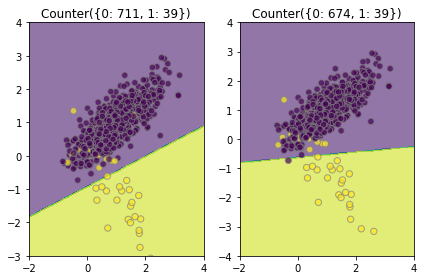

In [34]:
X, y = EditedNearestNeighbours(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [35]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       674
          1       0.96      0.59      0.73        39

avg / total       0.98      0.98      0.97       713



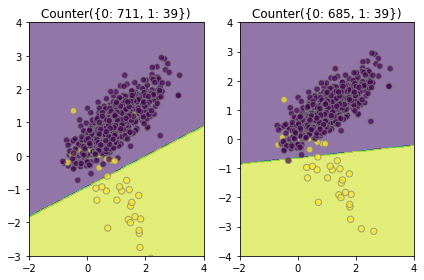

In [36]:
X, y = NeighbourhoodCleaningRule(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [37]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       685
          1       0.96      0.59      0.73        39

avg / total       0.98      0.98      0.97       724



## 오버 샘플링

* `RandomOverSampler`: random sampler
* `ADASYN`: Adaptive Synthetic Sampling Approach for Imbalanced Learning
* `SMOTE`: Synthetic Minority Over-sampling Technique

**ADASYN이나 SMOTE는 데이터들간 연결을 하고 연결선상에 새로운 데이터를 생성하는 방식이다.(SMOTE는 내부에만 생기며 ADASYN은 외부에도 생길 수 있다.**

In [38]:
from imblearn.over_sampling import *

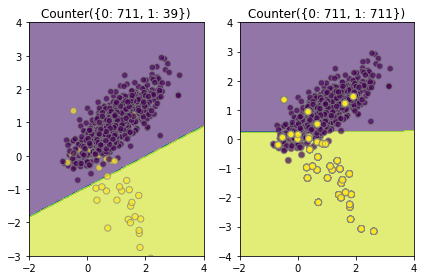

In [39]:
X, y = RandomOverSampler(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [40]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89       711
          1       0.89      0.87      0.88       711

avg / total       0.89      0.89      0.89      1422



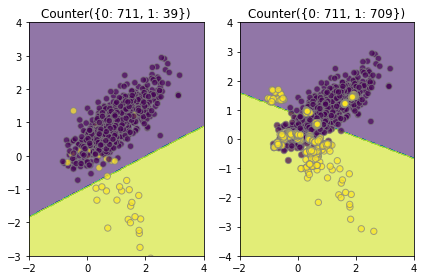

In [41]:
X, y = ADASYN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [42]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       711
          1       0.74      0.75      0.74       709

avg / total       0.74      0.74      0.74      1420



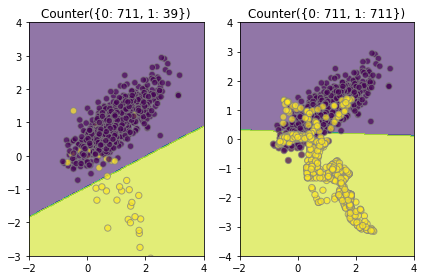

In [43]:
X, y = SMOTE(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [44]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.90      0.90       711
          1       0.90      0.91      0.90       711

avg / total       0.90      0.90      0.90      1422



## 복합 샘플링

* `SMOTEENN`: SMOTE + ENN
* `SMOTETomek`: SMOTE + Tomek

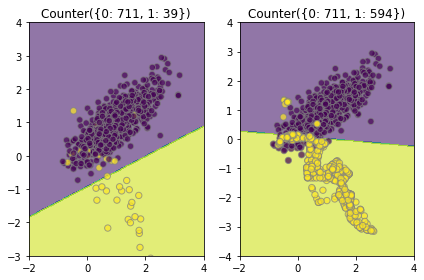

In [45]:
from imblearn.combine import *

X, y = SMOTEENN(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [46]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       711
          1       0.93      0.94      0.94       594

avg / total       0.94      0.94      0.94      1305



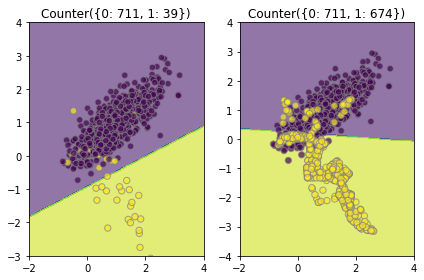

In [47]:
X, y = SMOTETomek(random_state=0).fit_sample(X0, y0)
y_pred = plot_samples(X, y)

In [48]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.91      0.92       711
          1       0.91      0.93      0.92       674

avg / total       0.92      0.92      0.92      1385



# 모형 최적화

머신 러닝 모형이 완성된 후에는 최적화 과정을 통해 예측 성능을 향상시킨다.

## Scikit-Learn 의 모형 하이퍼 파라미터 튜닝 도구

Scikit-Learn에서는 다음과 같은 모형 최적화 도구를 지원한다.

* [`validation_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)
  * 단일 하이퍼 파라미터 최적화
* [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  * 그리드를 사용한 복수 하이퍼 파라미터 최적화
* [`ParameterGrid`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html)  
 * 복수 파라미터 최적화용 그리드


## `validation_curve` 사용 예 

`validation_curve` 함수는 최적화할 파라미터 이름과 범위, 그리고 성능 기준을 `param_name`, `param_range`, `scoring` 인수로 받아 파라미터 범위의 모든 경우에 대해 성능 기준을 계산한다.

In [59]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)

In [60]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

CPU times: user 268 ms, sys: 256 ms, total: 524 ms
Wall time: 13.8 s


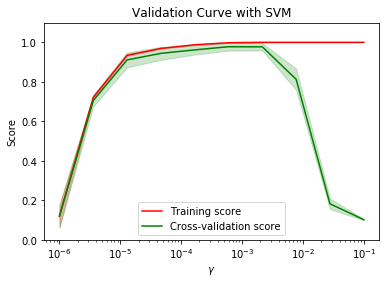

In [61]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

## `GridSearchCV` 사용예

`GridSearchCV`  클래스는 `validation_curve` 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다.  클래스 객체에 `fit` 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾아준다. 생성된 복수개와 내부 모형과 실행 결과는 다음 속성에 저장된다.

* `grid_scores_ `
 * param_grid 의 모든 파리미터 조합에 대한 성능 결과. 각각의 원소는 다음 요소로 이루어진 튜플이다.
  * parameters: 사용된 파라미터
  * mean_validation_score: 교차 검증(cross-validation) 결과의 평균값
  * cv_validation_scores: 모든 교차 검증(cross-validation) 결과
* `best_score_` 
 * 최고 점수 
* `best_params_`
 * 최고 점수를 낸 파라미터
* `best_estimator_`
 * 최고 점수를 낸 파라미터를 가진 모형

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = np.linspace(0.01, 10, 5)
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
%time gs = gs.fit(X, y)

CPU times: user 1.47 s, sys: 608 ms, total: 2.08 s
Wall time: 46.8 s


In [163]:
gs.cv_results_["params"]

({'clf__C': 0.01, 'clf__kernel': 'linear'},
 {'clf__C': 2.5074999999999998, 'clf__kernel': 'linear'},
 {'clf__C': 5.0049999999999999, 'clf__kernel': 'linear'},
 {'clf__C': 7.5024999999999995, 'clf__kernel': 'linear'},
 {'clf__C': 10.0, 'clf__kernel': 'linear'},
 {'clf__C': 0.01, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 0.01, 'clf__gamma': 2.5074999999999998, 'clf__kernel': 'rbf'},
 {'clf__C': 0.01, 'clf__gamma': 5.0049999999999999, 'clf__kernel': 'rbf'},
 {'clf__C': 0.01, 'clf__gamma': 7.5024999999999995, 'clf__kernel': 'rbf'},
 {'clf__C': 0.01, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'},
 {'clf__C': 2.5074999999999998, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'},
 {'clf__C': 2.5074999999999998,
  'clf__gamma': 2.5074999999999998,
  'clf__kernel': 'rbf'},
 {'clf__C': 2.5074999999999998,
  'clf__gamma': 5.0049999999999999,
  'clf__kernel': 'rbf'},
 {'clf__C': 2.5074999999999998,
  'clf__gamma': 7.5024999999999995,
  'clf__kernel': 'rbf'},
 {'clf__C': 2.5074999999999998, 'clf_

In [164]:
gs.cv_results_["mean_test_score"]

array([ 0.95269894,  0.95826377,  0.95826377,  0.95826377,  0.95826377,
        0.13967724,  0.10127991,  0.10127991,  0.11185309,  0.11185309,
        0.97106288,  0.10461881,  0.10239288,  0.10127991,  0.10127991,
        0.9705064 ,  0.10461881,  0.10239288,  0.10127991,  0.10127991,
        0.97161937,  0.10461881,  0.10239288,  0.10127991,  0.10127991,
        0.97161937,  0.10461881,  0.10239288,  0.10127991,  0.10127991])

In [165]:
print(gs.best_score_)
print(gs.best_params_)

0.971619365609
{'clf__C': 7.5024999999999995, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}


## `ParameterGrid` 사용예

때로는 scikit-learn 이 제공하는 GridSearchCV 이외의 방법으로 그리드 탐색을 해야하는 경우도 있다. 이 경우 파라미터를 조합하여 탐색 그리드를 생성해 주는 명령어가 `ParameterGrid` 이다. `ParameterGrid` 는 탐색을 위한 iterator 역할을 한다.

In [66]:
from sklearn.model_selection import ParameterGrid

In [67]:
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [68]:
param_grid = [{'kernel': ['linear']}, {'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

# 모형 최적화 분산 처리

모형 최적화를 위해서는 많은 반복 처리과 계산량이 필요하다. 보통은 복수의 프로세스, 혹은 컴퓨터에서 여러가지 다른 하이퍼 모수를 가진 모형을 훈련시킴으로써 모형 최적화에 드는 시간을 줄일 수 있다.

## Scikit-Learn 패키지의 기본 분산 처리

`GridSearchCV` 명령에는 `n_jobs` 라는 인수가 있다. 디폴트 값은 1인데 이 값을 증가시키면 내부적으로 멀티 프로세스를 사용하여 그리드서치를 수행한다. 만약 CPU 코어의 수가 충분하다면 `n_jobs`를 늘릴 수록 속도가 증가한다.

In [69]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [70]:
from sklearn.svm import SVC
model = SVC()

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {"gamma": np.logspace(-6, -1, 10)}
gs1 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
gs2 = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [73]:
%%time
gs1.fit(X, y)

CPU times: user 22.8 s, sys: 20 ms, total: 22.8 s
Wall time: 22.9 s


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [74]:
%%time
gs2.fit(X, y)

CPU times: user 352 ms, sys: 136 ms, total: 488 ms
Wall time: 5.68 s


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-06,   3.59381e-06,   1.29155e-05,   4.64159e-05,
         1.66810e-04,   5.99484e-04,   2.15443e-03,   7.74264e-03,
         2.78256e-02,   1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

## Dask.distributed 를 사용한 분산 처리

분산 처리를 위해서는 3개 이상의 노드가 필요하다.

* 호스트: 분산 처리를 호출하는 컴퓨터. 사용자 컴퓨터
* 스케줄러(scheduler): 분산 처리를 관리하는 컴퓨터. 외부 서버
* 워커(worker): 실제 계산을 담당하는 컴퓨터. 외부의 복수 서버

스케줄러는 호스트로부터 업무를 받아서 워커에게 전달하고 최종 결과를 정리하여 다시 호스트로 보낸다.

`dask.distributed`는 간단한 분산처리를 위한 파이썬 패키지이다. `dask.distributed`를 실행하려면 다음과 같은 순서를 따른다.

1. 호스트와 스케줄러, 워커에 동일한 파이썬 환경을 설치한다.
1. 스케줄러를 실행한다.
1. 워커 노드에서 스케줄러를 호출하여 자신을 등록한다.
1. 호스트에서 스케줄러를 호출한다.

자세한 과정은 `dask.distributed` 문서를 참조한다.
* [http://distributed.readthedocs.io/en/latest/index.html](http://distributed.readthedocs.io/en/latest/index.html)


다음은 Scikit-Learn에서 직접 스케줄러를 호출하는 코드 예제이다.

In [174]:
import distributed.joblib
from sklearn.externals.joblib import parallel_backend
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'C': np.logspace(-6, 6, 13),
    'gamma': np.logspace(-8, 8, 17),
    'tol': np.logspace(-4, -1, 4),
    'class_weight': [None, 'balanced'],
}

search = RandomizedSearchCV(model, param_space, cv=5, n_iter=20, n_jobs=-1, verbose=1)

In [175]:
%%time
search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s


CPU times: user 464 ms, sys: 272 ms, total: 736 ms
Wall time: 13.9 s


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06]), 'gamma': array([  1.00000e-08,   1.00000e-07,   1...00000e+08]), 'tol': array([ 0.0001,  0.001 ,  0.01  ,  0.1   ]), 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=1)

In [176]:
search.best_estimator_

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0000000000000001e-05,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.10000000000000001, verbose=False)

In [177]:
search.best_params_

{'C': 100000.0,
 'class_weight': None,
 'gamma': 1.0000000000000001e-05,
 'tol': 0.10000000000000001}

In [178]:
search.best_score_

0.95047301057317757

분산처리시 scheduler는 worker컴퓨터와 같은 네트워크에 있어야 관리가 편하다.